In [ ]:
# 📌 Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 📌 Step 2: Load the Dataset
data = pd.read_csv('data.csv')  # Replace with your file path if needed
print("First 5 rows:\n", data.head())


First 5 rows:
           Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105


In [ ]:
# 📌 Step 3: Explore the Data
print("\nData Info:")
print(data.info())
print("\nMissing values:\n", data.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB
None

Missing values:
 Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64


In [ ]:
# 📌 Step 4: Select Features and Target
X = data[['Volume', 'Weight']]
y = data['CO2']

In [ ]:
# 📌 Step 5: Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 📌 Step 6: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# 📌 Step 7: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 📌 Step 8: Evaluate the Model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print("Intercept:", model.intercept_)
print("Coefficients (Volume, Weight):", model.coef_)


Model Evaluation:
R² Score: 0.3294
Mean Squared Error: 58.08
Intercept: 101.52442593726562
Coefficients (Volume, Weight): [1.64437158 1.92166387]


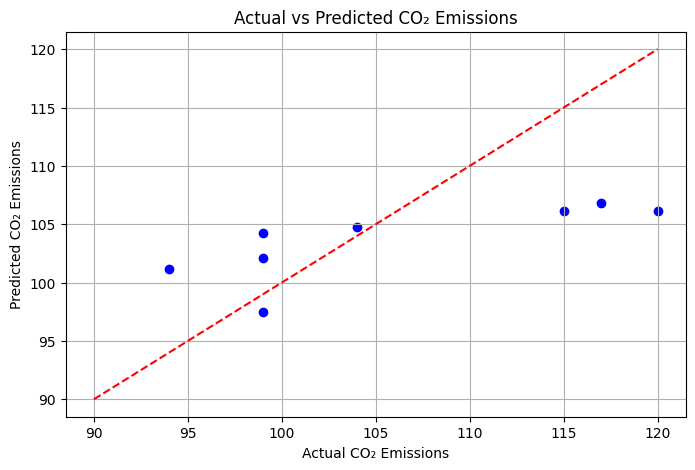

In [ ]:
# 📌 Step 9: Visualize Predictions vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel("Actual CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.grid(True)
plt.show()

In [ ]:
# 📌 Step 10: Make a Prediction
# Example: Engine Volume = 1.3L, Weight = 2300kg
sample = np.array([[1.3, 2300]])
sample_scaled = scaler.transform(sample)
predicted_co2 = model.predict(sample_scaled)
print(f"\nPredicted CO₂ emission for 1.3L & 2300kg car: {predicted_co2[0]:.2f}g")


Predicted CO₂ emission for 1.3L & 2300kg car: 102.73g


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
